Поистроить интерполяционные многочлены Лагранжа и Ньютона для функциии y = f(x) в заданных точках.
Вычислить значение в точке x*. 
Построить графики полученых многочленов и исходной функции.

y = cosx, x = [0, pi/6, 2pi/6, 3pi/6], x* = pi/4.

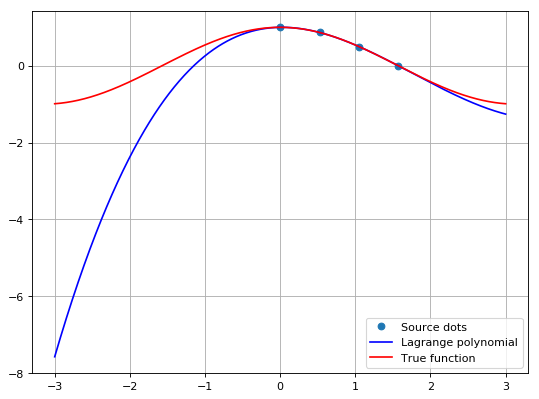

Значение полинома Лагранжа в точке x*: 0.7058892896287468
Значение исходной функции в точке x*: 0.7071067811865476


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from math import pi, cos


# Вычисление значения полнимона Лагранжа в точке t.
def lagrange(x, y, t): 
    ans = 0 
    for j in range(len(y)): 
        nom = 1 
        denom = 1 
        for i in range(len(x)): 
            if i != j:  
                nom = nom*(t - x[i]) 
                denom = denom*(x[j] - x[i]) 
        ans = ans + y[j] * nom / denom 
    return ans 

x = np.array([0, pi/6, pi/3, pi/2], dtype = float) 
y = np.cos(x)
xstar = pi/4

x_arr = np.linspace(-3, 3, 1000) 
y_lagr = [lagrange(x, y, i) for i in x_arr]
y_true = np.cos(x_arr)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_lagr, 'b', x_arr, y_true, 'r') 
plt.legend(("Source dots", "Lagrange polynomial", "True function"))
plt.grid(True)
plt.show()

print('Значение полинома Лагранжа в точке x*:', lagrange(x, y, xstar)) 
print('Значение исходной функции в точке x*:', cos(xstar))

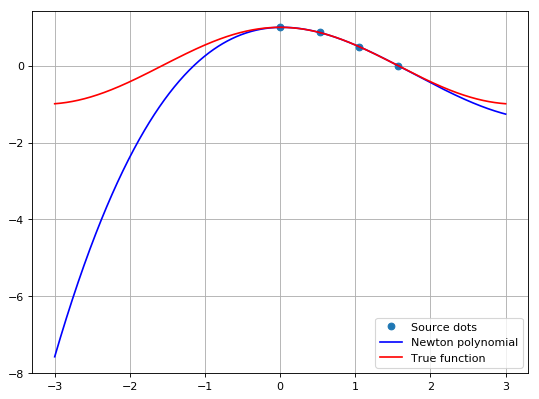

Значение полинома Ньютона в точке x*: 0.7058892896287468
Значение исходной функции в точке x*: 0.7071067811865476


In [37]:
#Вычисление разделённой разности
def div_diff(x, y):
    n = len(x)
    if n == 1:
        return y[0]
    if n == 2:
        return (y[0]-y[1])/(x[0]-x[1])
    else:
        return (div_diff(x[:n-1], y[:n-1]) - div_diff(x[1:n], y[1:n]))/(x[0]-x[n-1])

#Вычисление полинома Ньютона в точке t
def newton(x, y, t):
    n = len(x)
    ans = div_diff([x[0]], [y[0]])
    mul = 1
    for i in range(n-1):
        mul *= t - x[i]
        ans += mul * div_diff(x[:i+2], y[:i+2])
    return ans

x = np.array([0, pi/6, pi/3, pi/2], dtype = float) 
y = np.cos(x)
xstar = pi/4

x_arr = np.linspace(-3, 3, 1000) 
y_newton = [newton(x, y, i) for i in x_arr] 
y_true = np.cos(x_arr)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_newton, 'b', x_arr, y_true, 'r') 
plt.legend(("Source dots", "Newton polynomial", "True function"))
plt.grid(True) 
plt.show()

print('Значение полинома Ньютона в точке x*:', newton(x, y, xstar)) 
print('Значение исходной функции в точке x*:', cos(xstar))